# 1. Introduction.

# 2. Load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
sample_submission = pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/sample_submission.csv')
test = pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv')
train = pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv')

# 3. Data exploration.

| Variable              | Descripción  |
|-----------------------|---------------|
| open                  | Precio de apertura de la criptomoneda en ese minuto.      |
| high                  | Precio más alto alcanzado en ese minuto.      |
| low                   | Precio más bajo alcanzado en ese minuto.      |
| close                 | Precio de cierre de la criptomoneda al finalizar el minuto.      |
| volume                | Cantidad de criptomonedas transaccionadas durante ese minuto.      |
| quote_asset_volume    | Volumen de transacciones en la moneda de cotización (ej. USDT).      |
| number_of_trades      | Número de transacciones realizadas en ese minuto.      |
| taker_buy_base_volume | Volumen de compra de los takers en la moneda base.      |
| taker_buy_quote_volume | Volumen de compra de los takers en la moneda de cotización.    |
| target                | Indica la dirección del movimiento del precio en el siguiente minuto (1 para subir, 0 para mantenerse igual o bajar).      |

In [2]:
# Configurar el formato de salida con separadores de miles y dos decimales
test_formatted = test.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Mostrar el dataset formateado
test_formatted

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0.00,"1,652,817,480.00",0.43,0.43,0.43,0.43,"101,150.00","43,542.26",105.00,"46,109.00","19,851.72"
1,1.00,"1,652,817,540.00",0.43,0.43,0.43,0.43,"275,647.00","118,478.97",228.00,"91,260.00","39,217.63"
2,2.00,"1,652,817,600.00",0.43,0.43,0.43,0.43,"134,959.00","57,979.24",156.00,"56,685.00","24,357.54"
3,3.00,"1,652,817,660.00",0.43,0.43,0.43,0.43,"316,209.00","135,979.40",121.00,"161,740.00","69,552.27"
4,4.00,"1,652,817,720.00",0.43,0.43,0.43,0.43,"107,440.00","46,243.80",113.00,"31,096.00","13,384.34"
...,...,...,...,...,...,...,...,...,...,...,...
909612,"909,612.00","1,707,394,200.00",0.51,0.51,0.51,0.51,"115,358.00","59,321.71",64.00,"103,183.00","53,061.65"
909613,"909,613.00","1,707,394,260.00",0.51,0.51,0.51,0.51,"100,017.00","51,433.47",59.00,"29,333.00","15,084.38"
909614,"909,614.00","1,707,394,320.00",0.51,0.51,0.51,0.51,"51,665.00","26,573.99",46.00,"33,916.00","17,445.99"
909615,"909,615.00","1,707,394,380.00",0.51,0.51,0.51,0.51,"28,063.00","14,433.07",35.00,"16,810.00","8,645.65"


In [3]:
pd.options.display.float_format = '{:,.1f}'.format

In [4]:
sample_submission.head()

,row_id,target
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


## Test data.

In [5]:
test.head()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4,0.4,0.4,0.4,"101,150.0","43,542.3",105.0,"46,109.0","19,851.7"
1,1,1652817540,0.4,0.4,0.4,0.4,"275,647.0","118,479.0",228.0,"91,260.0","39,217.6"
2,2,1652817600,0.4,0.4,0.4,0.4,"134,959.0","57,979.2",156.0,"56,685.0","24,357.5"
3,3,1652817660,0.4,0.4,0.4,0.4,"316,209.0","135,979.4",121.0,"161,740.0","69,552.3"
4,4,1652817720,0.4,0.4,0.4,0.4,"107,440.0","46,243.8",113.0,"31,096.0","13,384.3"


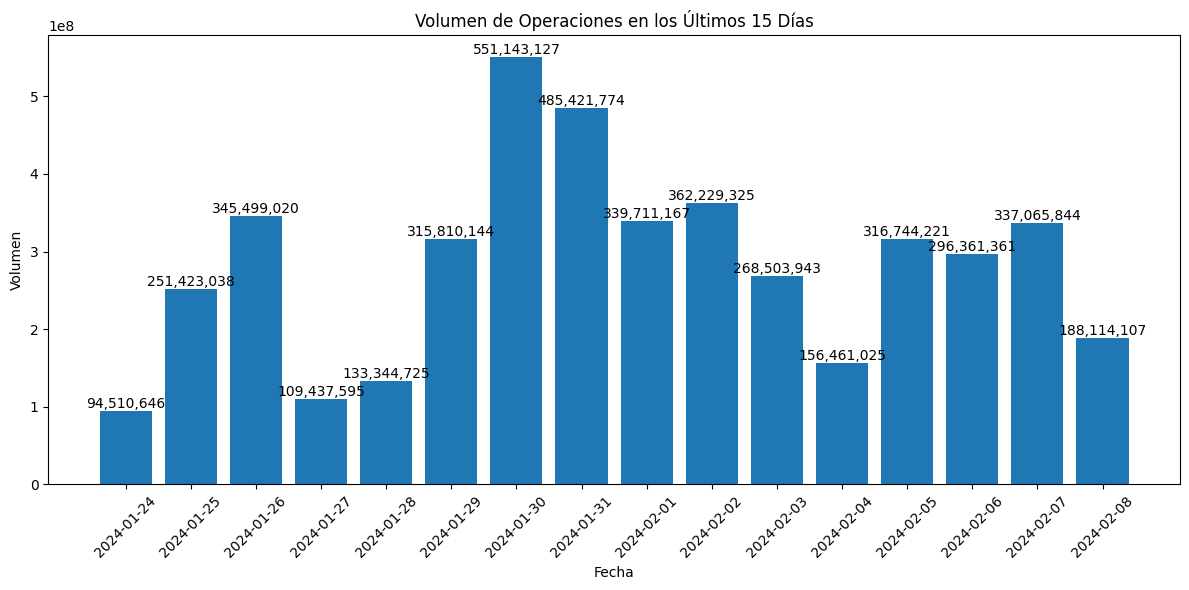

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertimos timestamp a formato de fecha
test['timestamp'] = pd.to_datetime(test['timestamp'], unit='s')

# Define la fecha de corte
cutoff_date = test['timestamp'].max() - pd.Timedelta(days=15)

# Filtra los datos para obtener solo los últimos 15 días
filtered_data = test[test['timestamp'] >= cutoff_date].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Extrae solo la fecha y agrupa por día
filtered_data.loc[:, 'date'] = filtered_data['timestamp'].dt.date  # Usar .loc para la asignación
daily_volume = filtered_data.groupby('date')['volume'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(daily_volume.index.astype(str), daily_volume.values)  # Cambiamos el índice a string para las etiquetas

# Añadir números encima de las barras
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de cada barra
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             f"{yval:,.0f}",
             ha='center',
             va='bottom')  # Añadir texto

# Configuración del gráfico
plt.title('Volumen de Operaciones en los Últimos 15 Días')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [7]:
test.describe()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
count,"909,617.0",909617,"909,617.0","909,617.0","909,617.0","909,617.0","909,617.0","909,617.0","909,617.0","909,617.0","909,617.0"
mean,"454,808.0",2023-03-29 16:06:00.000000512,0.5,0.5,0.5,0.5,"248,465.6","118,700.6",149.8,"123,981.8","59,201.0"
min,0.0,2022-05-17 19:58:00,0.3,0.3,0.3,0.3,0.0,0.0,0.0,0.0,0.0
25%,"227,404.0",2022-10-22 18:02:00,0.4,0.4,0.4,0.4,"75,387.0","33,555.2",53.0,"32,095.0","14,330.6"
50%,"454,808.0",2023-03-29 16:06:00,0.5,0.5,0.5,0.5,"147,237.0","67,067.5",88.0,"69,829.0","31,662.8"
75%,"682,212.0",2023-09-03 14:10:00,0.5,0.5,0.5,0.5,"274,818.0","128,533.2",151.0,"139,877.0","65,139.6"
max,"909,616.0",2024-02-08 12:14:00,0.9,0.9,0.9,0.9,"40,839,065.0","22,183,185.2","48,569.0","22,273,822.0","11,536,132.8"
std,"262,584.0",NaN,0.1,0.1,0.1,0.1,"460,664.7","249,447.2",364.2,"234,378.6","126,820.6"


In [8]:
test.isnull().sum()

row_id                    0
timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
dtype: int64

## Train data.

In [9]:
train.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.9,0.9,0.9,0.9,135.0,121.6,4.0,125.1,112.7,1.0
1,1525471320,0.9,0.9,0.9,0.9,"1,070.5",965.5,12.0,879.9,793.6,0.0
2,1525471380,0.9,0.9,0.9,0.9,"2,293.1","2,067.0",5.0,0.0,0.0,0.0
3,1525471440,0.9,0.9,0.9,0.9,"6,850.6","6,175.0",19.0,"1,786.3","1,610.1",0.0
4,1525471500,0.9,0.9,0.9,0.9,832.3,750.2,3.0,784.8,707.4,0.0


In [10]:
train.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,"2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0","2,122,438.0"
mean,"1,589,144,370.0",0.5,0.5,0.5,0.5,"248,489.0","165,010.6",212.2,"123,727.9","82,308.2",0.5
std,"36,761,713.2",0.3,0.3,0.3,0.3,"641,638.3","488,701.3",537.3,"324,925.2","248,867.6",0.5
min,"1,525,471,260.0",0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
25%,"1,557,307,815.0",0.3,0.3,0.3,0.3,"24,984.3","7,835.3",27.0,"10,836.9","3,409.2",0.0
50%,"1,589,144,370.0",0.4,0.4,0.4,0.4,"78,333.1","28,531.9",68.0,"36,221.4","13,620.0",0.0
75%,"1,620,980,925.0",0.7,0.7,0.7,0.7,"233,494.8","131,578.6",197.0,"114,577.8","63,225.4",1.0
max,"1,652,817,480.0",2.0,2.0,2.0,2.0,"63,661,784.8","35,564,708.8","40,535.0","30,870,205.2","16,026,150.1",1.0


In [11]:
train.isnull().sum()

timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
target                    0
dtype: int64

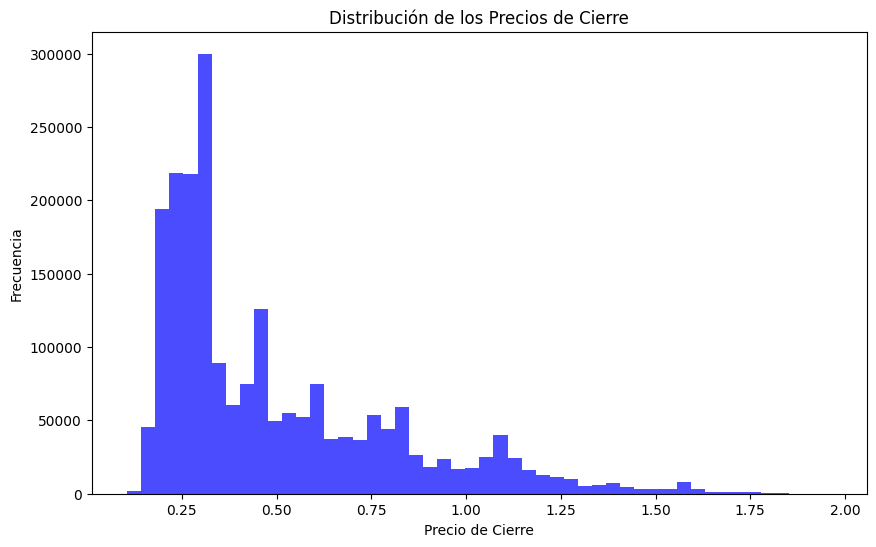

In [12]:
# Histograma de la columna 'close' (precio de cierre)
plt.figure(figsize=(10,6))
plt.hist(train['close'], bins=50, color='blue', alpha=0.7)
plt.title('Distribución de los Precios de Cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Al revisar el histograma y otras visualizaciones, notamos que una gran parte de los datos de precios de cierre se agrupan en valores más bajos, indicando una tendencia general a la disminución en el valor de la criptomoneda.

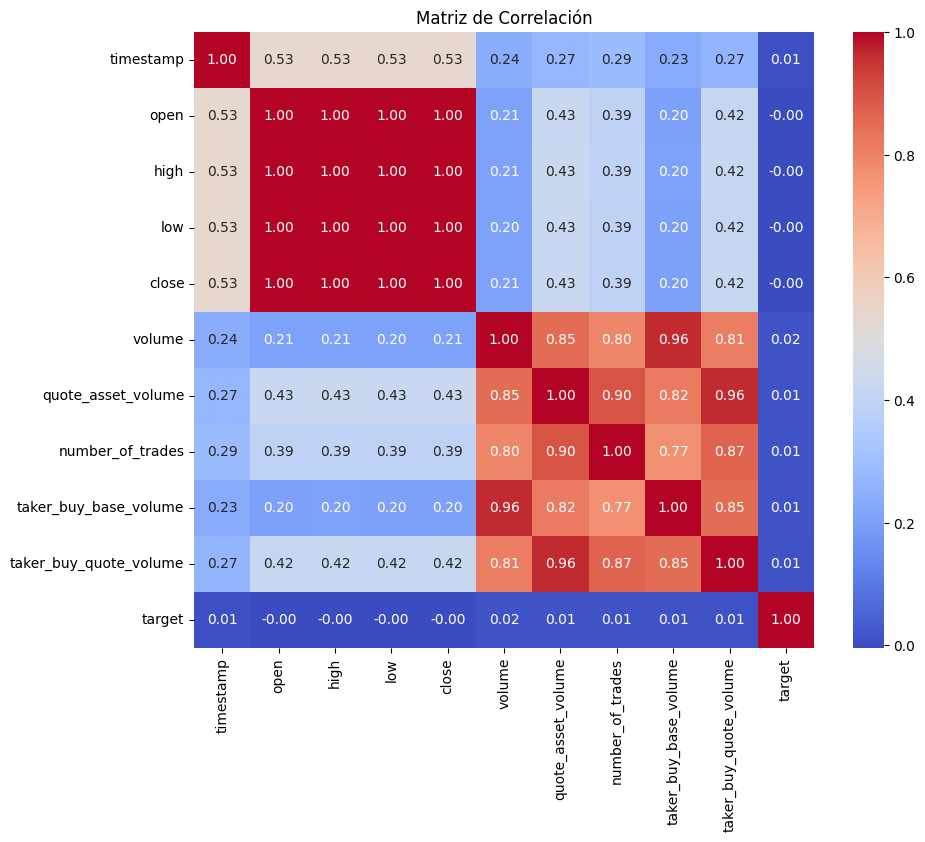

In [13]:
# Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Bullet points.
---
* Los precios de apertura, máximo, mínimo y cierre están fuertemente relacionados, lo que indica que los movimientos en el precio durante un periodo afectan directamente los precios de apertura y cierre del siguiente.
* Un mayor volumen de transacciones está asociado con un mayor volumen en términos de la moneda cotizada, lo que sugiere que un mayor interés de los traders genera más actividad en el mercado.
* Aunque el volumen no está tan fuertemente correlacionado con los precios de apertura y cierre, un aumento en el volumen podría estar asociado con movimientos en el precio, lo que es importante considerar en estrategias de trading.
---

In [14]:
train.corr()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
timestamp,1.0,0.5,0.5,0.5,0.5,0.2,0.3,0.3,0.2,0.3,0.0
open,0.5,1.0,1.0,1.0,1.0,0.2,0.4,0.4,0.2,0.4,-0.0
high,0.5,1.0,1.0,1.0,1.0,0.2,0.4,0.4,0.2,0.4,-0.0
low,0.5,1.0,1.0,1.0,1.0,0.2,0.4,0.4,0.2,0.4,-0.0
close,0.5,1.0,1.0,1.0,1.0,0.2,0.4,0.4,0.2,0.4,-0.0
volume,0.2,0.2,0.2,0.2,0.2,1.0,0.8,0.8,1.0,0.8,0.0
quote_asset_volume,0.3,0.4,0.4,0.4,0.4,0.8,1.0,0.9,0.8,1.0,0.0
number_of_trades,0.3,0.4,0.4,0.4,0.4,0.8,0.9,1.0,0.8,0.9,0.0
taker_buy_base_volume,0.2,0.2,0.2,0.2,0.2,1.0,0.8,0.8,1.0,0.8,0.0
taker_buy_quote_volume,0.3,0.4,0.4,0.4,0.4,0.8,1.0,0.9,0.8,1.0,0.0


In [15]:
# Convertimos timestamp a formato de fecha
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

# Crear nuevas columnas con información extraída del timestamp
train['hour'] = train['timestamp'].dt.hour
train['day'] = train['timestamp'].dt.day
train['month'] = train['timestamp'].dt.month
train['year'] = train['timestamp'].dt.year

# Verificar los cambios
train.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,hour,day,month,year
0,2018-05-04 22:01:00,0.9,0.9,0.9,0.9,135.0,121.6,4.0,125.1,112.7,1.0,22,4,5,2018
1,2018-05-04 22:02:00,0.9,0.9,0.9,0.9,"1,070.5",965.5,12.0,879.9,793.6,0.0,22,4,5,2018
2,2018-05-04 22:03:00,0.9,0.9,0.9,0.9,"2,293.1","2,067.0",5.0,0.0,0.0,0.0,22,4,5,2018
3,2018-05-04 22:04:00,0.9,0.9,0.9,0.9,"6,850.6","6,175.0",19.0,"1,786.3","1,610.1",0.0,22,4,5,2018
4,2018-05-04 22:05:00,0.9,0.9,0.9,0.9,832.3,750.2,3.0,784.8,707.4,0.0,22,4,5,2018


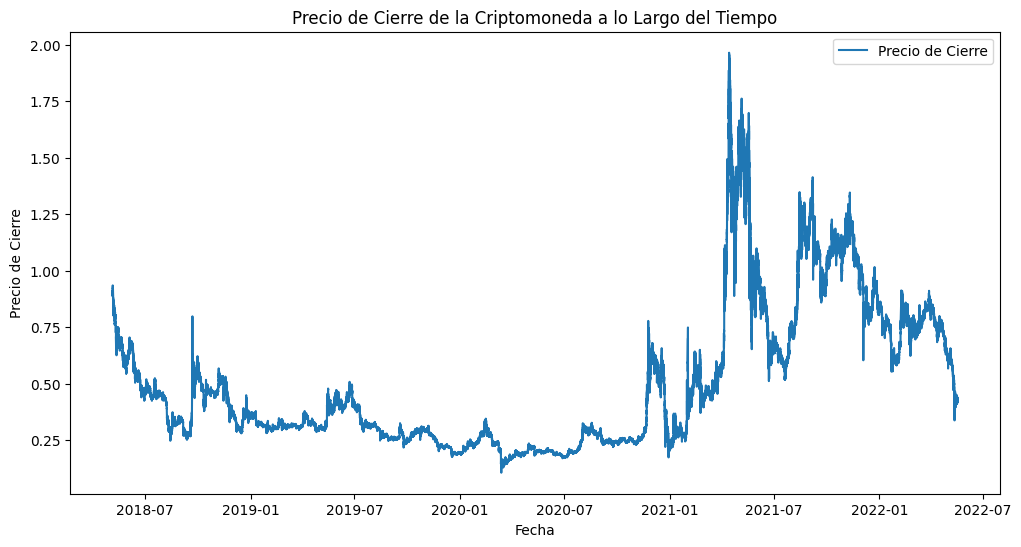

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train['timestamp'], train['close'], label='Precio de Cierre')
plt.title('Precio de Cierre de la Criptomoneda a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

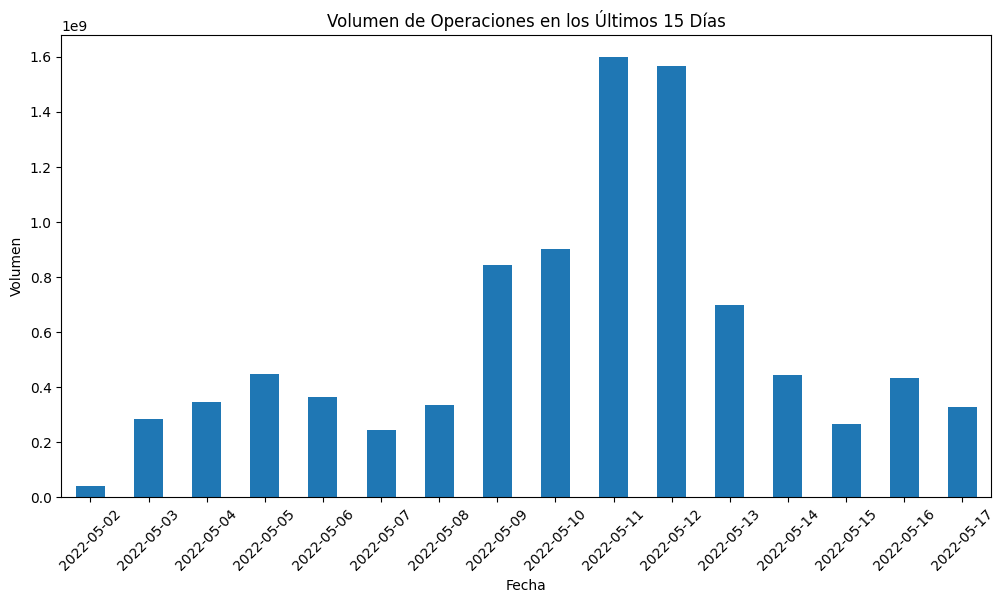

In [17]:
# Define la fecha de corte
cutoff_date = train['timestamp'].max() - pd.Timedelta(days=15)

# Filtra los datos para obtener solo los últimos 15 días
filtered_data = train[train['timestamp'] >= cutoff_date].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Extrae solo la fecha y agrupa por día
filtered_data.loc[:, 'date'] = filtered_data['timestamp'].dt.date  # Usar .loc para la asignación
daily_volume = filtered_data.groupby('date')['volume'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
daily_volume.plot(kind='bar')
plt.title('Volumen de Operaciones en los Últimos 15 Días')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.xticks(rotation=45)
plt.show()

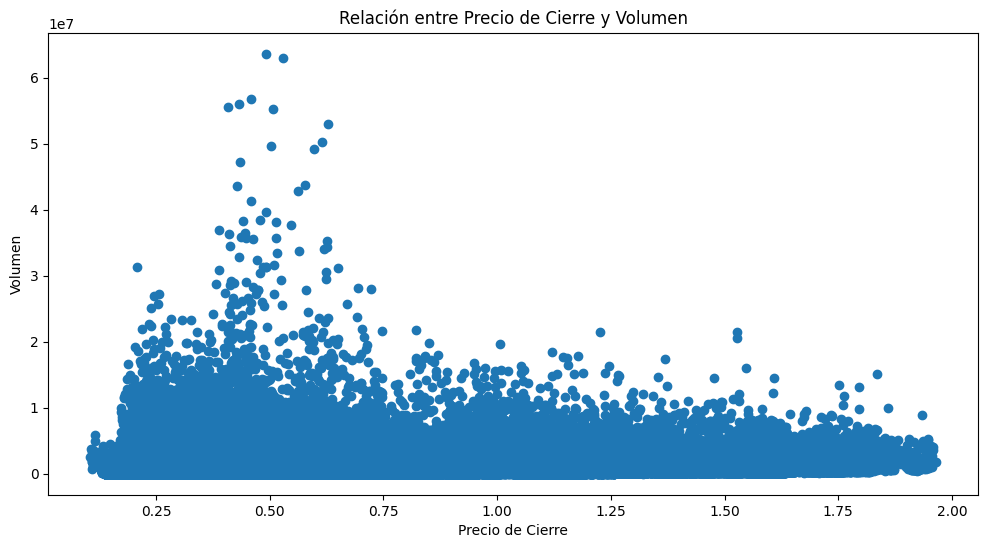

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(train['close'], train['volume'])
plt.title('Relación entre Precio de Cierre y Volumen')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.show()